# Analiza LEGO kompletov


In [99]:
import pandas as pd
import math
kompleti = pd.read_csv('podatki.csv')

In [100]:
kompleti["Cena_z_inflacijo"] = kompleti.Cena * (1.03 ** (2023 - kompleti.Leto_izdaje))
kompleti["Cena_z_inflacijo_glede_na_kos"] = kompleti.Cena_z_inflacijo / kompleti.Št_delov
kompleti['popularnost'] = (0.3 * kompleti.Želijo_komplet + 1 * kompleti.Imajo_komplet) * kompleti.Ocena

Pri računanju cene z inflacijo sem predpostavil tri odstotno povprečno letno inflacijo, saj so cene s strani ameriške.
Popularnost sem izračunal iz podatkov, koliko ljudi v skupnosti komplet ima, koliko ljudi si komplet želi in ocene kompleta, kjer je število ljudi, ki komplet imajo obteženo.

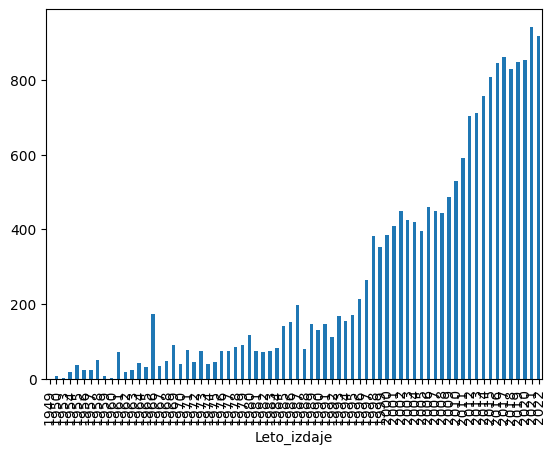

In [101]:
kompleti.groupby('Leto_izdaje').size().plot.bar()
stari_kompleti = kompleti[kompleti.Leto_izdaje <= 2001]
novejsi_kompleti = kompleti[kompleti.Leto_izdaje > 2001]


Za mejo med starejšimi in novejšimi kompleti sem izbral letnico 2001, ne le ker so podatki za starejša leta pomanjkljivi, ampak tudi zato, ker je takrat firma LEGO izdala prve komplete teme Bionicle, poznavalci pa se strinjajo da je ta tema firmo rešila pred propadom in kocke ponovno popularizirala, kar nam zgornji graf tudi pokaže.

<AxesSubplot: xlabel='Leto_izdaje'>

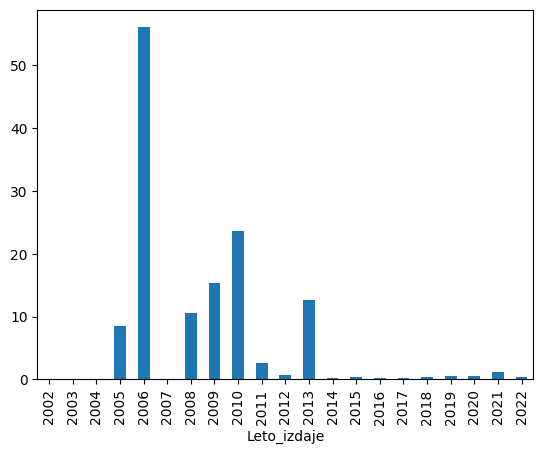

In [102]:
novejsi_kompleti_glede_na_leto = novejsi_kompleti.groupby("Leto_izdaje").mean(numeric_only = True)
novejsi_kompleti_glede_na_leto["Cena_z_inflacijo_glede_na_kos"].plot.bar()

Graf nam kljub pomanjkanju podatkov za zgodnejša leta pokaže, da presenetljivo cena kock v zadnjih letih narašča v stopničasti obliki. Morda na to vpliva spreminjajoče se zanimanje za LEGO kocke skozi leta.

<AxesSubplot: xlabel='Leto_izdaje'>

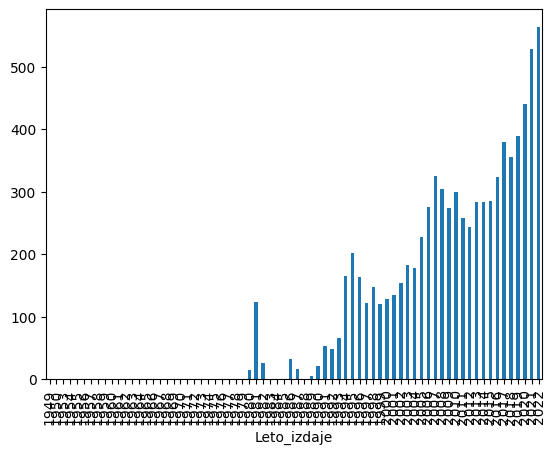

In [103]:
kompleti_glede_na_leto = kompleti.groupby("Leto_izdaje").mean(numeric_only = True)
kompleti_glede_na_leto["Št_delov"].plot.bar()

# Rast cen s časom
Da se število delov v kompletih z leti viša ni presenetljivo, saj se z večjo popularnostjo veča tudi povpraševanje, možen razlog za naraščanje pa je tudi odraščanje ljubiteljev, ki lahko kot odrasli kupujejo večje komplete.

In [104]:

kompleti_glede_na_temo = kompleti.groupby("Tema").mean(numeric_only = True)
kompleti_glede_na_temo[["Cena_z_inflacijo_glede_na_kos"]].sort_values("Cena_z_inflacijo_glede_na_kos").dropna().tail(15)

,Cena_z_inflacijo_glede_na_kos
Tema,
Toy-Story,0.203845
Vidiyo,0.205487
Juniors,0.227101
Serious-Play,0.234892
Boost,0.240779
Super-Mario,0.271070
City,0.277843
Collectable-Minifigures,0.296212
Dimensions,0.374853


# Vpliv licence na ceno
Med petnajstimi najdražjimi temami glede na število kosov je 6 licenčnih tem, 7 tem, ki nimajo licence, a vsebujejo "normalne" kocke, tj. kocke, ki nimajo posebne oblike in so narejene iz plastike. 

Najdražje štiri teme in tema Boost vsebujejo komplete z elektroniko, motorji in senzorji ter hidravličnimi mehanizmi. Smiselno je, da so taki kompleti dražji, ker vsebujejo posebne materiale, take kocke pa so bolj zapletene za izdelavo.

Na vrhu sta še temi Classic in Duplo.
Classic je tako visoko na seznamu najverjetneje zaradi napake, ker so stari kompleti (iz petdesetih in šestdesetih let) vsi te teme in jih je ocena inflacije najverjetneje prekomerno podražila.
Duplo zavzame šesto mesto, ker so te kocke namenjene zelo mladim otrokom in so dvakrat večje od klasičnih kock. Take kocke porabijo več materiala in so posledično dražje.

Med tridesetimi najdražjimi temami je enajst licenčnih tem kar ovrže hipotezo, da so take teme najdražje

<AxesSubplot: xlabel='popularnost', ylabel='Unikatne_Minifigure'>

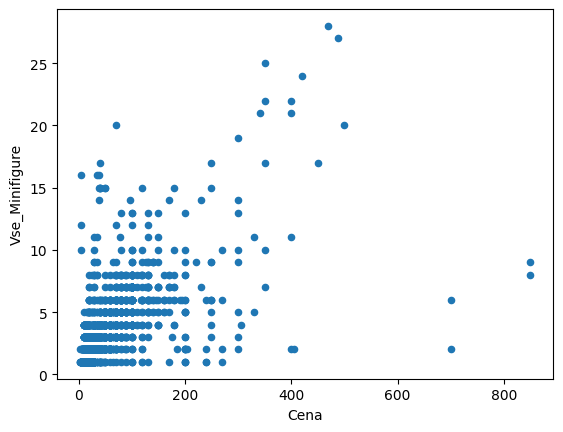

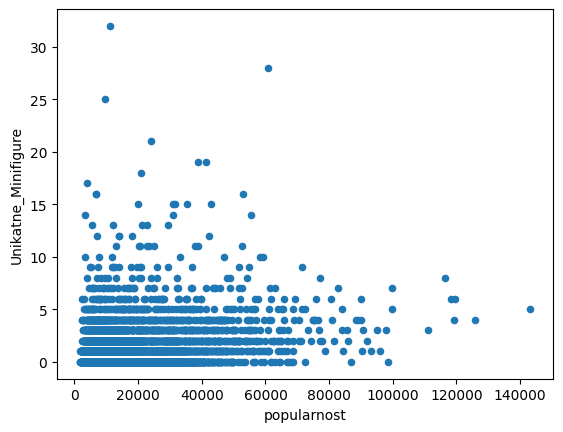

In [105]:
kompleti.sort_values('Cena').plot.scatter(x='Cena', y='Vse_Minifigure')
kompleti.sort_values('popularnost').plot.scatter(x='popularnost', y='Unikatne_Minifigure')

# Vpliv minifigur
Grafa nam povesta, da ima velika večina kompletov manj kot osem minifigur, le-te pa nimajo velikega vpliva na ceno ali na popularnost kompleta, saj so točke razporejene dokaj enakomerno v cenovnem razponu manj kot 100 dolarjev, kamor spadajo skoraj vsi kompleti.

,popularnost,Cena,Ocena,Št_delov
Oblikovalec,,,,
Morten Rauff,27792.562083,36.444545,3.966667,417.041667
Jamie Berard,30239.622500,NaN,4.112500,979.812500
Ryan Van Woerkom,30958.980000,29.230000,3.800000,335.000000
Hans Burkhard Schlömer,31779.159459,126.670667,4.005405,937.026316
Jason Zapantis,36682.002857,34.990000,3.971429,342.500000
Aaron Anderson,37386.057000,39.788667,3.943333,303.806452
Niels M. Frederiksen,39588.524286,70.100769,3.928571,566.750000
César Soares,41719.076667,120.184737,4.061111,1077.789474
Florian Müller,75730.620000,179.990000,4.200000,2569.000000


Oblikovalec
 Mark Stafford           72
 Justin Ramsden          75
 Jørn Thomsen            83
 Adam Grabowski          95
 Steen Sig Andersen     105
Henrik Rubin Saaby      119
 Bjarke Lykke Madsen    126
Nina Koopmann           130
 Henrik Andersen        158
 Mel Caddick            168
dtype: int64

<AxesSubplot: xlabel='popularnost', ylabel='Št_delov'>

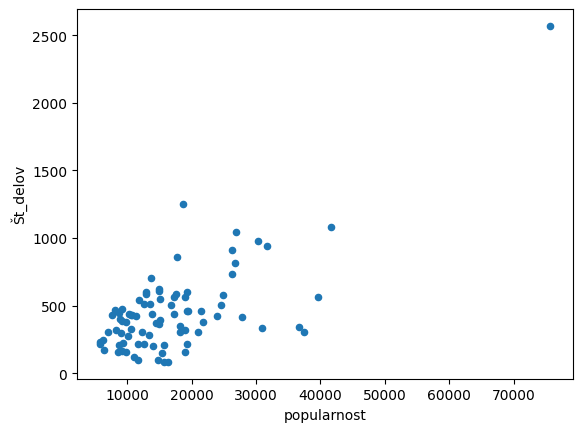

In [106]:
povprecje = kompleti[["popularnost", "Cena", "Ocena", "Oblikovalec", "Št_delov"]].groupby("Oblikovalec").mean(numeric_only = True)
st_kompletov = kompleti.groupby("Oblikovalec").size()
mozna_korelacija = povprecje.merge(st_kompletov.rename('st_kompletov'), left_index=True, right_index=True)
display(povprecje.sort_values('popularnost').tail(10))
display(st_kompletov.sort_values().tail(10))
mozna_korelacija.sort_values('popularnost').plot.scatter(x='popularnost', y='Št_delov')


# Oblikovalci
Zanimivo je, da seznama oblikovalcev z največ kompleti in najpopularnejših oblikovalcev sploh nista podobna.

Mogoče je to zaradi nepravilne formule za izračun popularnosti, morda pa si manj delovni oblikovalci za vsak komplet vzamejo več časa in so le-ti zato bolj dodelani in popularni. Popularnost ima tudi šibko linearno korelacijo z številom delov, zato je možno, da so bolj produktivni oblikovalci manj popularni, saj oblikujejo več kompletov, ki so manjši.